# **Análisis de segmentación de clientes**
**Objetivo:** Segmentar a los clientes en función de sus patrones de consumo, patrones de uso y características demográficas, incluido el número de población de cada ciudad.

### Pasos:

- Preparación de datos
- Análisis de datos exploratorios (EDA)
- Ingeniería de características
- Preprocesamiento de datos
- Modelado (agrupación)
- Perfilado de segmentos
- Desarrollo de estrategias
- Análisis paso a paso y código Python


## 1. Preparación de datos
Cargar datos, garantizando que el conjunto de datos esté cargado y limpio.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los archivos desde drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargar los archivos desde drive
# from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Archivos_BDs/data_challenge.csv", sep=",")
# Leer el archivo de csv y asignarlo al objeto 'df'df=pd.merge(df,df_Pobl, on='descrip_poblac_suministro', how='inner')
#df = pd.read_csv('C://Prueba//Vanti//data_challenge.csv')
# Convertir la fecha a datetime si no lo está ya
df['fec_contab_documento'] = pd.to_datetime(df['fec_contab_documento'])
# Leer el archivo de csv y asignarlo al objeto 'df'
#df_Pobl = pd.read_excel('C://Prueba//Vanti//Pobla_2024Est.xlsx')
df_Pobl = pd.read_excel("/content/drive/MyDrive/Archivos_BDs/Pobla_2024Est.xlsx")
df=pd.merge(df,df_Pobl, on='descrip_poblac_suministro', how='inner')
df = df.drop(['Codi', 'Dep'], axis=1)
df['categoria_cliente'] = df['categoria_cliente'].astype('category')
df['porcion'] = df['porcion'].astype('category')
df['descrip_poblac_suministro'] = df['descrip_poblac_suministro'].astype('category')
print(df.shape)
# Display first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df.fillna(method='ffill', inplace=True)

(108895, 8)
                     cuenta fec_contab_documento  consumo categoria_cliente  \
0  AATHHM6d7TyIT1ubMnB14A==           2023-04-22      0.0                60   
1  AATHHM6d7TyIT1ubMnB14A==           2023-05-23      0.0                60   
2  AATHHM6d7TyIT1ubMnB14A==           2023-06-23      0.0                60   
3  AATHHM6d7TyIT1ubMnB14A==           2023-07-22      0.0                60   
4  AATHHM6d7TyIT1ubMnB14A==           2023-08-23      0.0                60   

  porcion  dias_fact descrip_poblac_suministro  Pobl_2024  
0     P14         33                    BOGOTA  7929539.0  
1     P14         27                    BOGOTA  7929539.0  
2     P14         33                    BOGOTA  7929539.0  
3     P14         27                    BOGOTA  7929539.0  
4     P14         29                    BOGOTA  7929539.0  
cuenta                          0
fec_contab_documento            0
consumo                         0
categoria_cliente               0
porcion          

## 2. Análisis de datos exploratorios (EDA)
Comprender las estadísticas básicas y visualizar los datos.

                fec_contab_documento        consumo      dias_fact  \
count                         108895  108895.000000  108895.000000   
mean   2023-11-01 13:10:15.862987008      23.852588      29.588365   
min              2023-03-06 00:00:00       0.000000       3.000000   
25%              2023-07-17 00:00:00       5.000000      29.000000   
50%              2023-11-07 00:00:00      11.000000      30.000000   
75%              2024-02-21 00:00:00      19.000000      31.000000   
max              2024-05-29 00:00:00   60061.000000      67.000000   
std                              NaN     495.513117       1.686468   

          Pobl_2024  
count  1.088950e+05  
mean   5.089459e+06  
min    3.047000e+03  
25%    2.163260e+05  
50%    7.929539e+06  
75%    7.929539e+06  
max    7.929539e+06  
std    3.688751e+06  


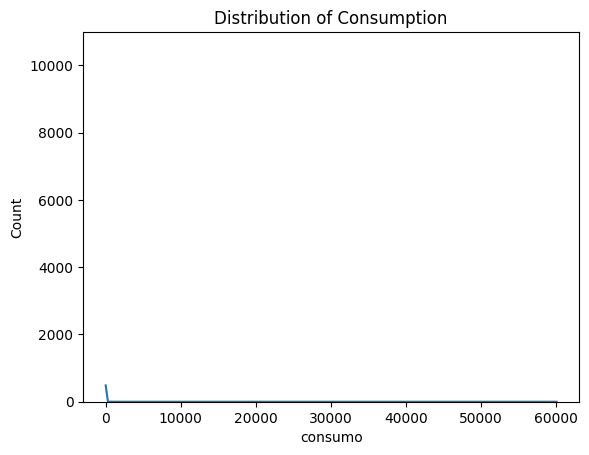

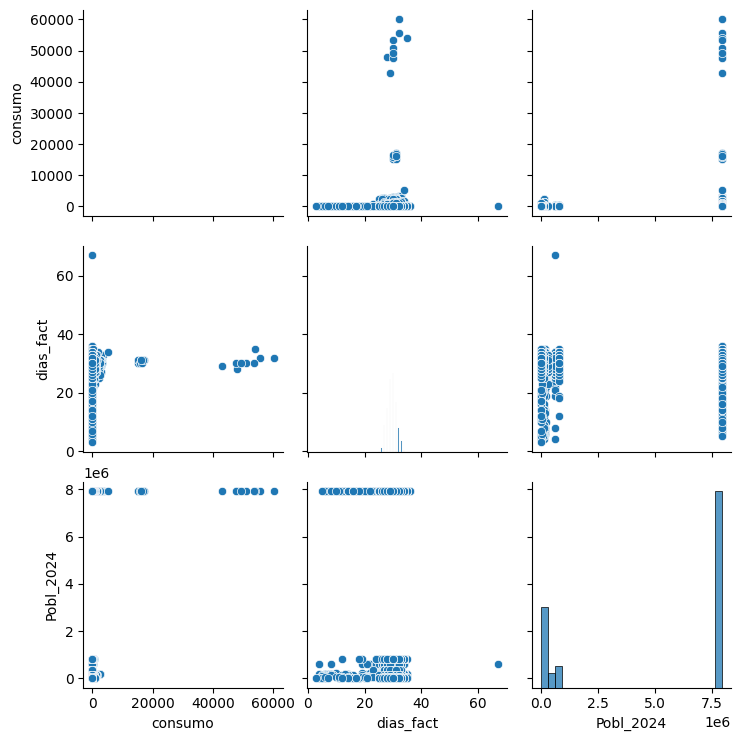

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Distribution of consumption
sns.histplot(df['consumo'], kde=True)
plt.title('Distribution of Consumption')
plt.show()

# Pairplot to see relationships between features
sns.pairplot(df)
plt.show()

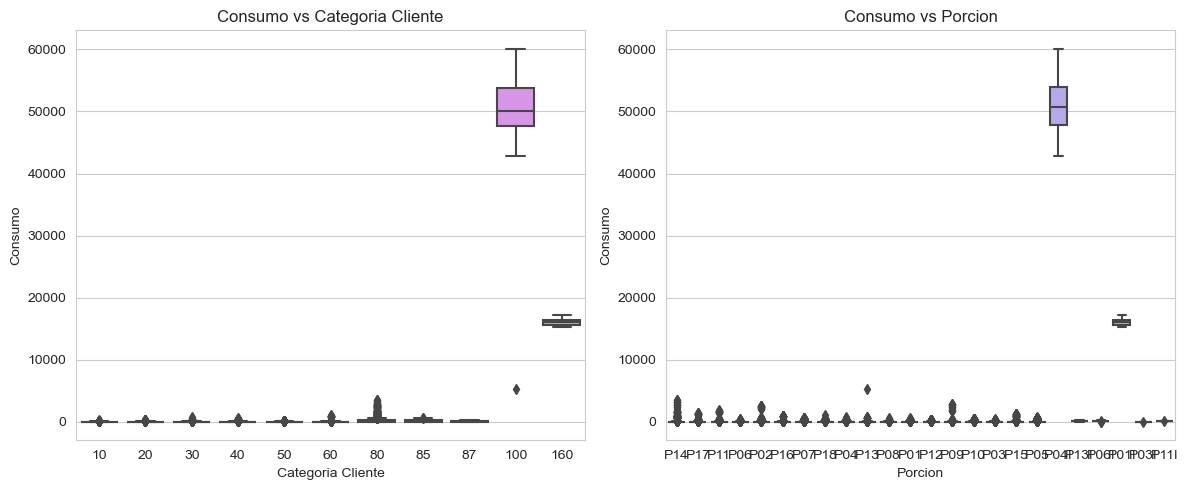

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos en un DataFrame llamado 'df'
# con columnas 'result', 'age', y 'sex'

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica de resultados vs edad
sns.boxplot(x="categoria_cliente", y="consumo", data=df, ax=ax1)
ax1.set_title("Consumo vs Categoria Cliente")
ax1.set_xlabel("Categoria Cliente")
ax1.set_ylabel("Consumo")

# Gráfica de resultados vs sexo
sns.boxplot(x="porcion", y="consumo", data=df, ax=ax2)
ax2.set_title("Consumo vs Porcion")
ax2.set_xlabel("Porcion")
ax2.set_ylabel("Consumo")

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

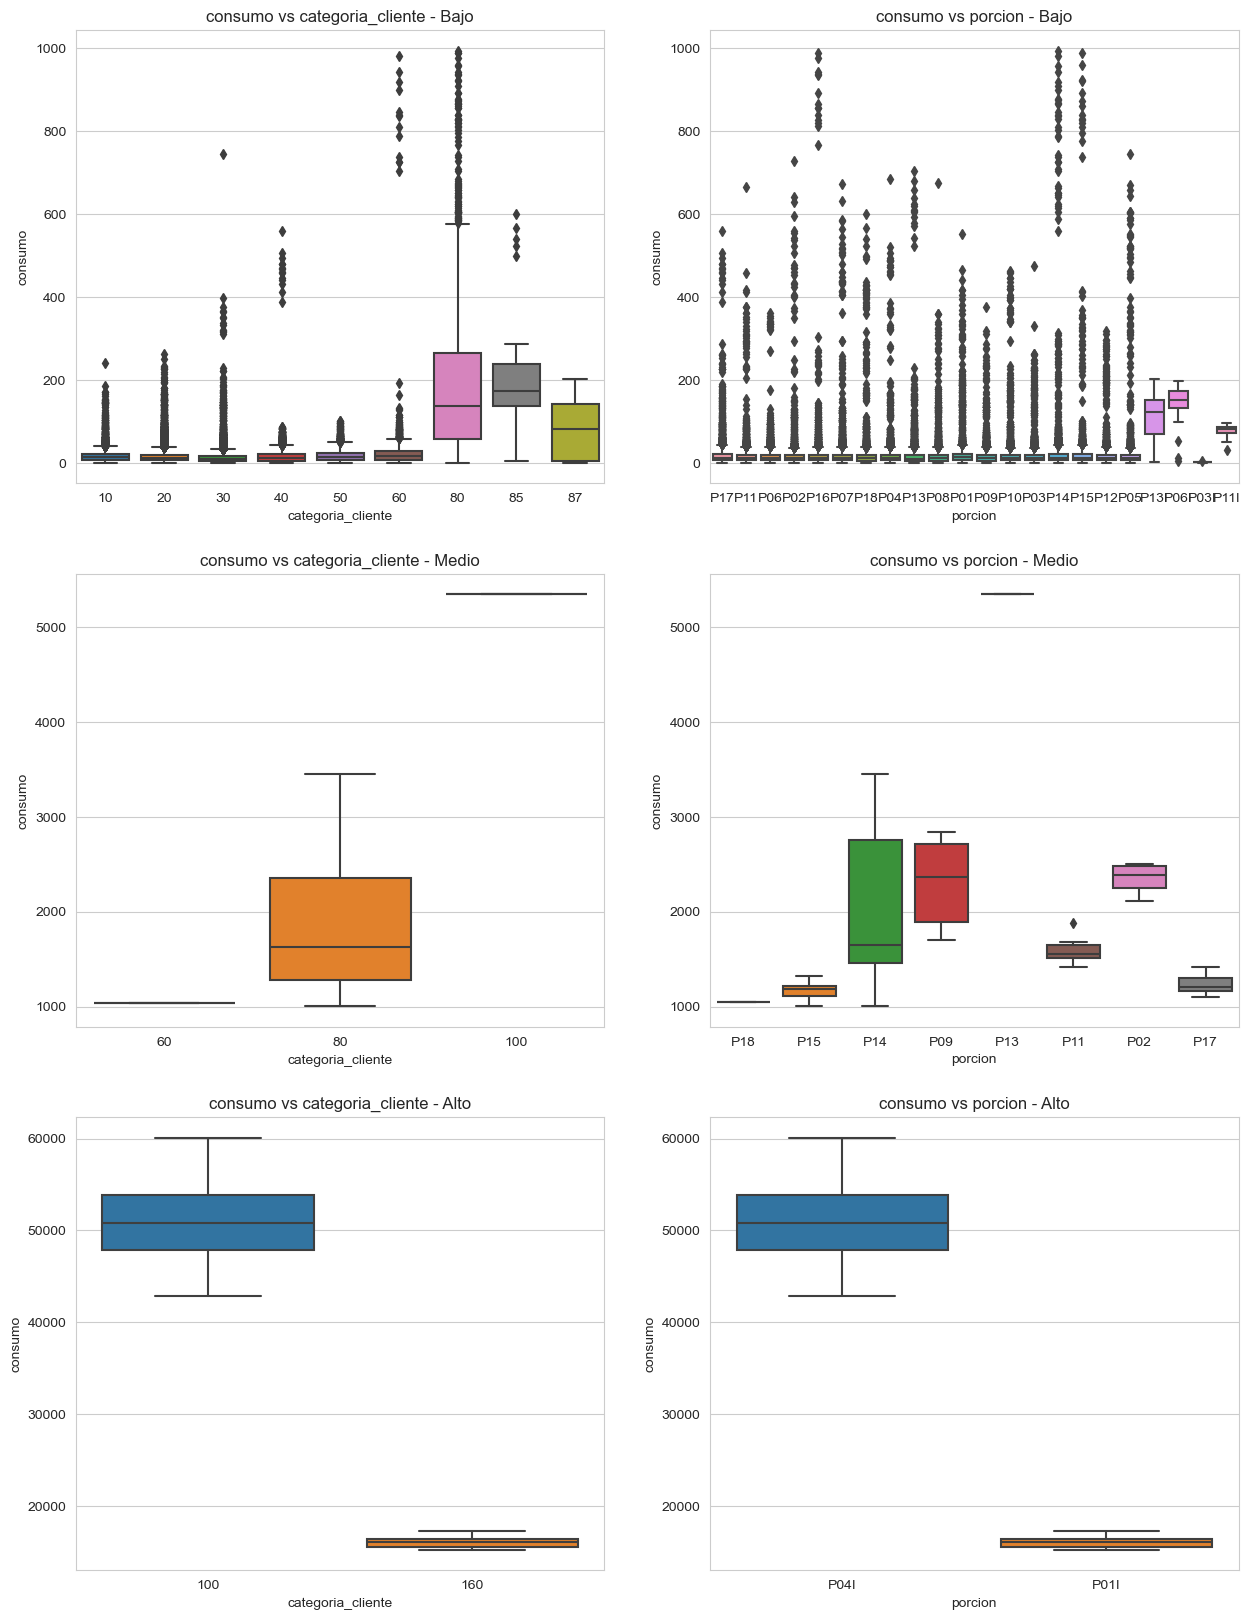

In [ ]:
# Dividir los datos en grupos basados en el rango de consumo
df['grupo_consumo'] = pd.cut(df['consumo'], bins=[0, 1000, 10000, np.inf], labels=['Bajo', 'Medio', 'Alto'])

# Crear subplots para cada grupo
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
for i, grupo in enumerate(['Bajo', 'Medio', 'Alto']):
    df_grupo = df[df['grupo_consumo'] == grupo]
    sns.boxplot(x='categoria_cliente', y='consumo', data=df_grupo, ax=axes[i, 0])
    sns.boxplot(x='porcion', y='consumo', data=df_grupo, ax=axes[i, 1])
    axes[i, 0].set_title(f'consumo vs categoria_cliente - {grupo}')
    axes[i, 1].set_title(f'consumo vs porcion - {grupo}')

C:\Users\Usuario - PC\AppData\Local\Temp\ipykernel_5060\1075153077.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_tienda = df.groupby(["descrip_poblac_suministro"])["consumo"].sum()
C:\Users\Usuario - PC\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


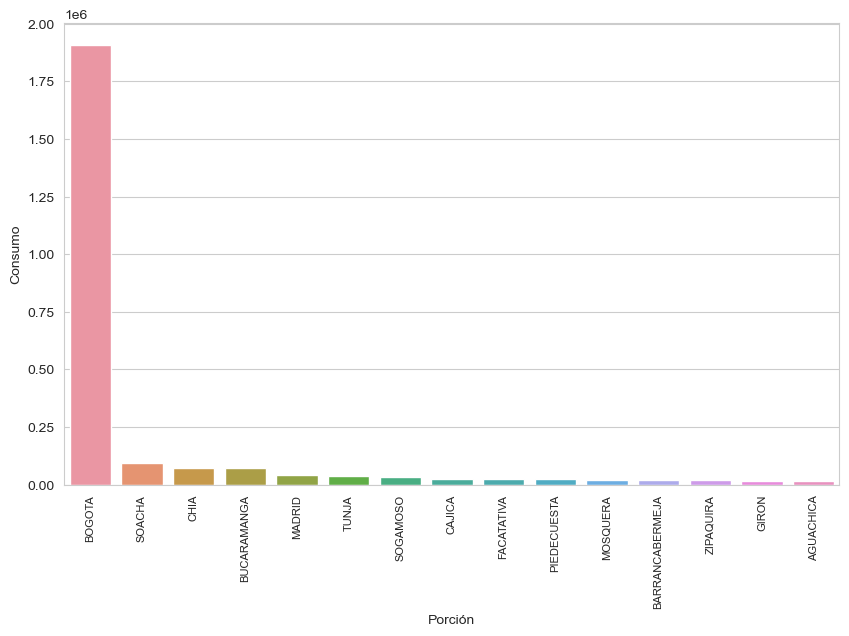

In [ ]:
# Crear el gráfico
# Agrupar los datos y sumar el consumo
Consumo_Ciu = df.groupby(["descrip_poblac_suministro"])["consumo"].sum()

# Ordenar los datos y seleccionar las 15 primeras filas
Consumo_Ciu.sort_values(ascending=False, inplace=True)
Consumo_Ciu = Consumo_Ciu[0:15].reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(y="consumo", x="descrip_poblac_suministro", data=Consumo_Ciu, order=Consumo_Ciu.sort_values('consumo', ascending=False)["descrip_poblac_suministro"])

# Establecer las etiquetas de los ejes
ax.set_xlabel("Porción")
ax.set_ylabel("Consumo")

# Rotar las etiquetas del eje X en forma vertical
plt.xticks(rotation=90, fontsize=8)

# Mostrar el gráfico
plt.show()

## Correlación
Validación de correlación más altas con relación a la variable objetivo.

In [ ]:
columns_num = df.select_dtypes(include = np.number).columns.values
columns_num

array(['consumo', 'dias_fact', 'Pobl_2024'], dtype=object)

In [ ]:
#validación de las variables que tienen una correlación superior al 5%
df_numerical_corr = df[columns_num].corr()['consumo']
df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > 0.005].sort_values(ascending=False)
df_numerical_most_corr

consumo      1.000000
Pobl_2024    0.010574
dias_fact    0.009741
Name: consumo, dtype: float64

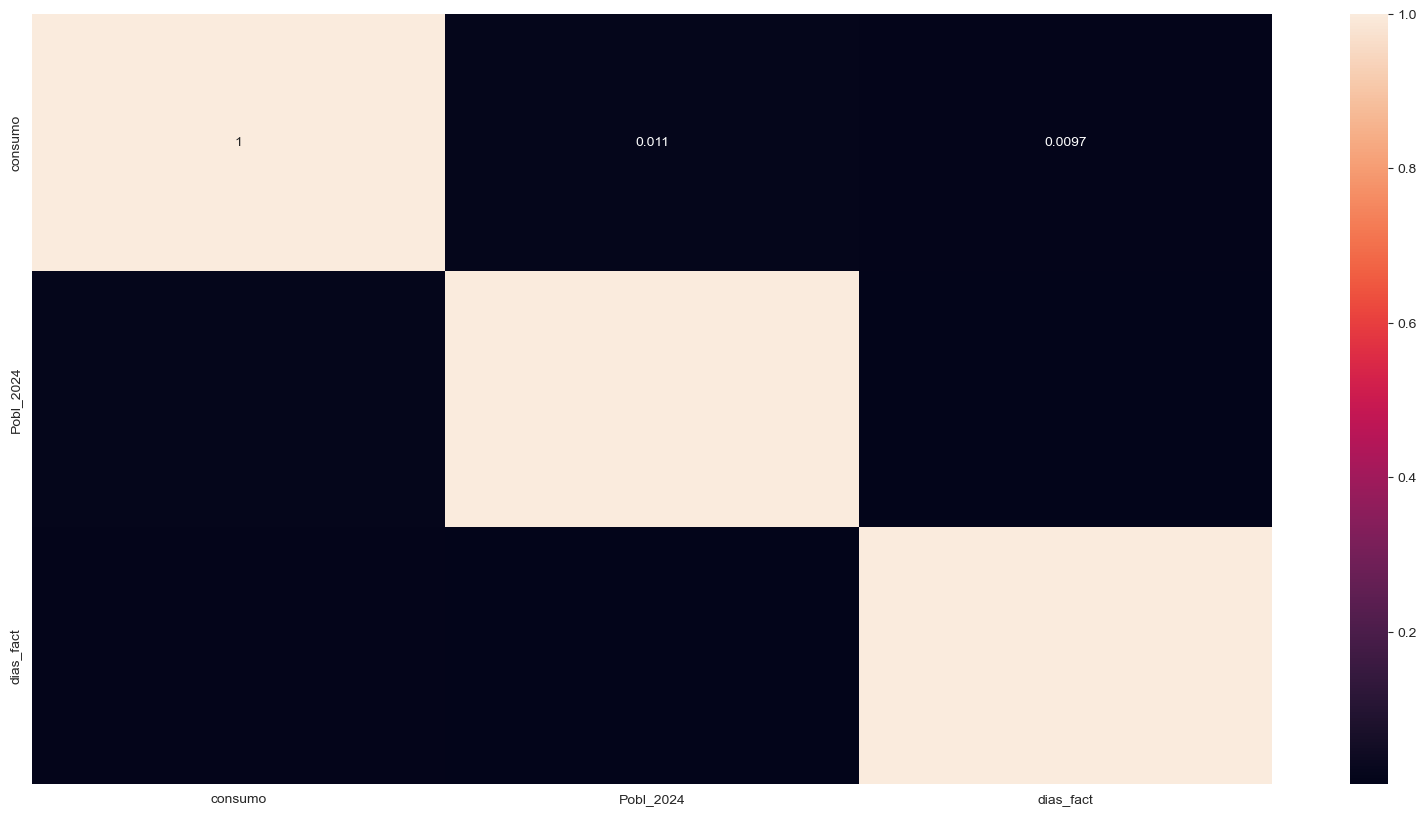

In [ ]:
cor=df_numerical_most_corr.index
cor
plt.figure(figsize=(20,10))
correlation_mat = df[cor].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

## Estadístico Chi-cuadrado
El valor Chi2, el valor p, los grados de libertad y la tabla de frecuencias esperadas para cada variable predictora

Un valor p bajo (por ejemplo, < 0.05) indicará que hay una asociación significativa entre la variable predictora y la variable objetivo discretizada.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

# Supongamos que ya cargaste los datos en el DataFrame 'df'
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Discretizar la variable objetivo 'consumo'
# Utilizando KBinsDiscretizer para discretizar 'consumo' en 5 categorías
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['consumo_binned'] = kbins.fit_transform(df[['consumo']])

# Verificar las nuevas categorías creadas
print(df['consumo_binned'].value_counts())

# Crear una función para realizar la prueba Chi-cuadrado
def chi_square_test(variable):
    contingency_table = pd.crosstab(df[variable], df['consumo_binned'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

# Variables predictoras a analizar
predictor_variables = ['categoria_cliente', 'porcion', 'descrip_poblac_suministro']

# Realizar la prueba Chi-cuadrado para cada variable predictora
for variable in predictor_variables:
    chi2, p, dof, expected = chi_square_test(variable)
    print(f"Variable: {variable}")
    print(f"Chi2: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies Table:")
    print(expected)
    print("-----------------------------")

consumo_binned
0.0    108877
1.0         9
4.0         6
3.0         3
Name: count, dtype: int64
Variable: categoria_cliente
Chi2: 206899.59985120822
p-value: 0.0
Degrees of Freedom: 30
Expected Frequencies Table:
[[1.36027511e+04 1.12443179e+00 3.74810597e-01 7.49621195e-01]
 [3.71488584e+04 3.07080215e+00 1.02360072e+00 2.04720143e+00]
 [3.64259779e+04 3.01104734e+00 1.00368245e+00 2.00736489e+00]
 [1.34167819e+04 1.10905919e+00 3.69686395e-01 7.39372790e-01]
 [3.33244907e+03 2.75467193e-01 9.18223977e-02 1.83644795e-01]
 [2.56357618e+03 2.11910556e-01 7.06368520e-02 1.41273704e-01]
 [2.29662031e+03 1.89843427e-01 6.32811424e-02 1.26562285e-01]
 [3.19947105e+01 2.64474953e-03 8.81583176e-04 1.76316635e-03]
 [3.89935534e+01 3.22328849e-03 1.07442950e-03 2.14885899e-03]
 [9.99834703e+00 8.26484228e-04 2.75494743e-04 5.50989485e-04]
 [8.99851233e+00 7.43835805e-04 2.47945268e-04 4.95890537e-04]]
-----------------------------
Variable: porcion
Chi2: 217790.0
p-value: 0.0
Degrees of Freed

### Conclusiones Resultados Prueba Chi
hLas variabes - categoria_cliente y porcion: Ambas variables muestran una asociación significativa con consumo, esto quiere decir que podrían ser buenas predictoras, de la variable objetivo "consumo".

descrip_poblac_suministro: No muestra una asociación significativa con consumo, por lo que podría no ser relevante en el contexto de predicción del consumta.

## 3. Ingeniería de carácteristicas
Creación de nuevas variables, tal es el casos de una nueva variables que puede ser p.e. el consumo total o el consumo per cápita.

In [ ]:
# Example: Consumption per capita
df['consumo_per_capita'] = df['consumo'] / df['Pobl_2024']

## 4. Preprocesamiento de datos
Estandarizar los datos y manejar variables categóricas.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Variables categóricas y numéricas
categorical_vars = ['categoria_cliente', 'porcion', 'descrip_poblac_suministro']
numerical_vars = ['consumo', 'consumo_per_capita', 'Pobl_2024']

# Usamos OneHotEncoder para variables categóricas
encoder = OneHotEncoder()
X_categorical = encoder.fit_transform(df[categorical_vars])

# Convertir las variables categóricas codificadas a DataFrame
categorical_df = pd.DataFrame(X_categorical.toarray(), columns=encoder.get_feature_names_out(categorical_vars))

# StandardScaler para variables numéricas
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df[numerical_vars])

# Convertir las variables numéricas escaladas a DataFrame
numerical_df = pd.DataFrame(X_numerical, columns=numerical_vars)

# Combinar los DataFrames categóricos y numéricos
final_df = pd.concat([categorical_df, numerical_df], axis=1)

# Mostrar las primeras filas del DataFrame final
print(final_df.head())

   categoria_cliente_10  categoria_cliente_20  categoria_cliente_30  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   categoria_cliente_40  categoria_cliente_50  categoria_cliente_60  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   1.0   
4                   0.0                   0.0                   1.0   

   categoria_cliente_80  categoria_cliente_85  categoria_cliente_87  \
0                   0.0                   0.0                   0.0   
1   

## 5. Modelado (agrupación)
Agrupación mediante KMeans para la segmentación.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

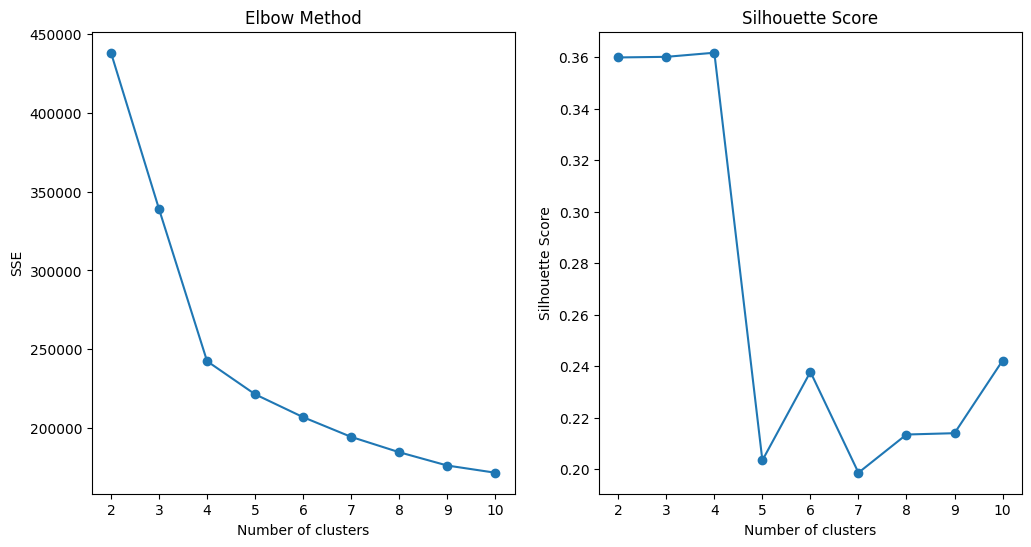

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Número óptimo de grupos utilizando el método del codo(elbow method) y el método de silueta(silhouette score).
sse = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(final_df, kmeans.labels_))

# Plot SSE and silhouette score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Choose the optimal number of clusters (e.g., 4) based on the plots
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['segment'] = kmeans.fit_predict(final_df)

- **Método del Codo:** Este el gráfico muestra un punto de inflexión (el “codo”) alrededor de 4 clústeres. A partir de ese punto, la disminución en la suma de errores cuadráticos (SSE) es menos pronunciada. Por lo tanto, 4 clústeres podrían ser una elección adecuada.

- **Puntuación Silhouette:** El gráfico muestra que la puntuación silhouette alcanza su punto máximo alrededor de 5 clústeres, 5 clústeres podrían ser óptimos para lograr una buena separación entre los grupos.
-
En resumen, utilizar 4 o 5 clústeres son la cantidad óptima para segmentar la poblacións

### Modelado

In [ ]:
# Convertir 'fec_contab_documento' a datetime y extraer características
df['fec_contab_documento'] = pd.to_datetime(df['fec_contab_documento'])
df['mes'] = df['fec_contab_documento'].dt.month
df['anio'] = df['fec_contab_documento'].dt.year
# Initialize the features list
features = ['consumo', 'categoria_cliente', 'Pobl_2024']  # Create the 'features' variable
features.extend(['mes', 'anio'])

In [ ]:
# Crear un DataFrame con las características seleccionadas
X = df[features].copy()

In [ ]:
# Codificar variables categóricas (si es necesario)
X = pd.get_dummies(X, columns=['categoria_cliente'], dtype=int)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Función para visualizar los clústeres
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='deep')
    plt.title(title)
    plt.show()

# Función para evaluar los clústeres
def evaluate_clusters(X, labels):
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Calinski-Harabasz Score: {calinski:.4f}")
    else:
        print("No se puede calcular las métricas: todos los puntos están en un solo clúster.")

C:\Users\Usuario - PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario - PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario - PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario - PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario - PC\anacon

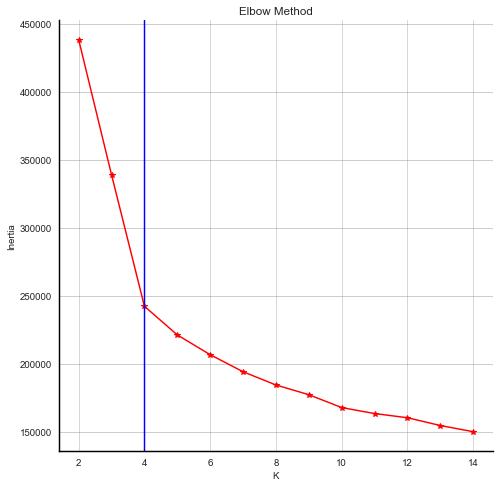

In [ ]:
# Principal Components Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(final_df)
final_df_pca = pca.transform(final_df)
final_df_pca

# Encontrar la cantidad óptima de clústeres, mediante el método del codo
# y la gráfica de silueta
from sklearn.metrics.cluster import silhouette_samples
sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters = k)
    y_predict = km.fit_predict(final_df_pca)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(final_df_pca, y_predict))

# Gráfica del método del codo
fig, ax = plt.subplots(figsize = (8,8), dpi = 70)
plt.plot(K, sum_of_squared_distances, "r-*")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.axvline(x = 4, color = "blue")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [ ]:
print(final_df.shape);print(X_scaled.shape)

(108895, 131)
(108895, 3)


C:\Users\Usuario - PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


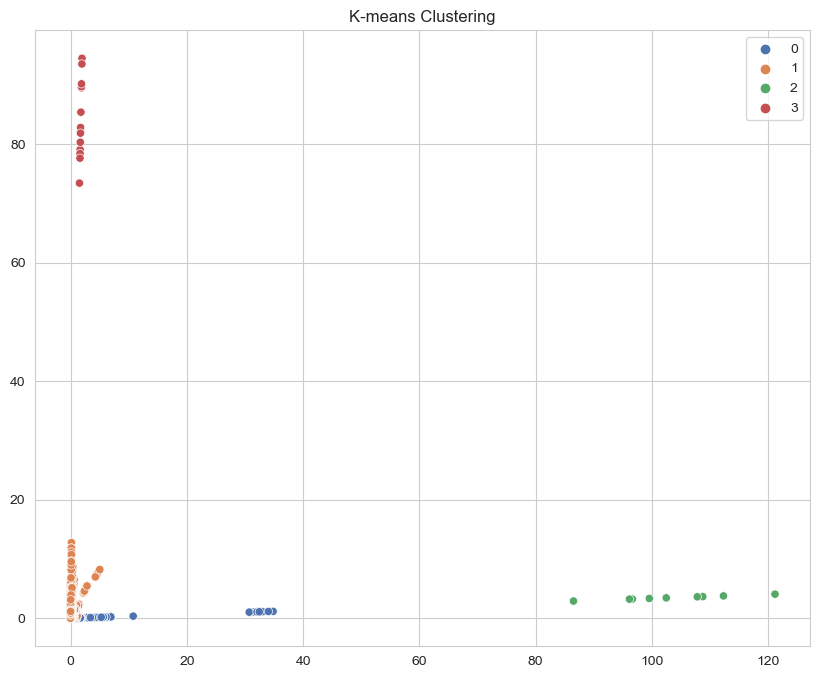

Silhouette Score: 0.9459
Calinski-Harabasz Score: 504760.8480


In [ ]:
# 1. K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, kmeans_labels, "K-means Clustering")
evaluate_clusters(X_scaled, kmeans_labels)

C:\Users\Usuario - PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


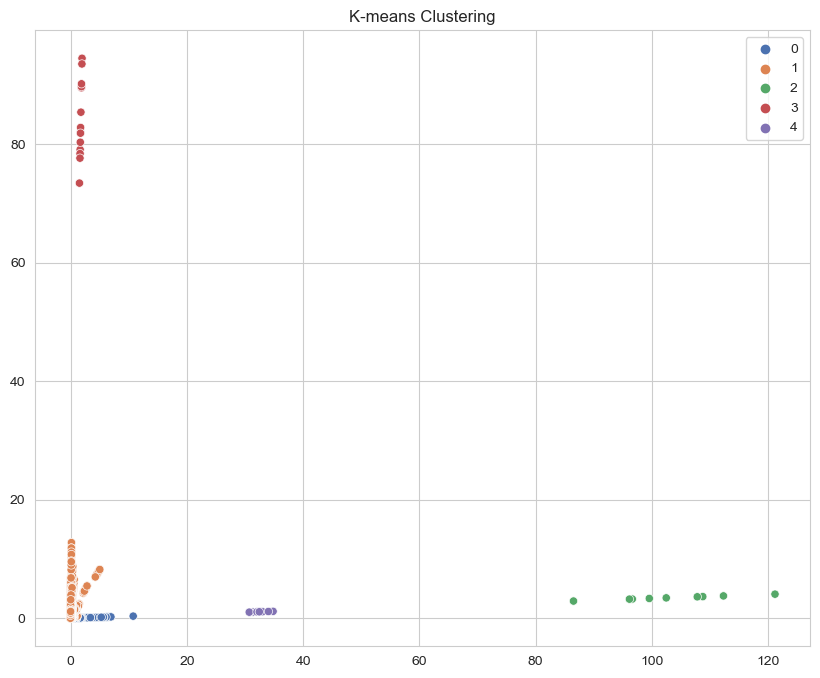

Silhouette Score: 0.9472
Calinski-Harabasz Score: 687139.6887


In [ ]:
# 1. K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, kmeans_labels, "K-means Clustering")
evaluate_clusters(X_scaled, kmeans_labels)

C:\Users\Usuario - PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


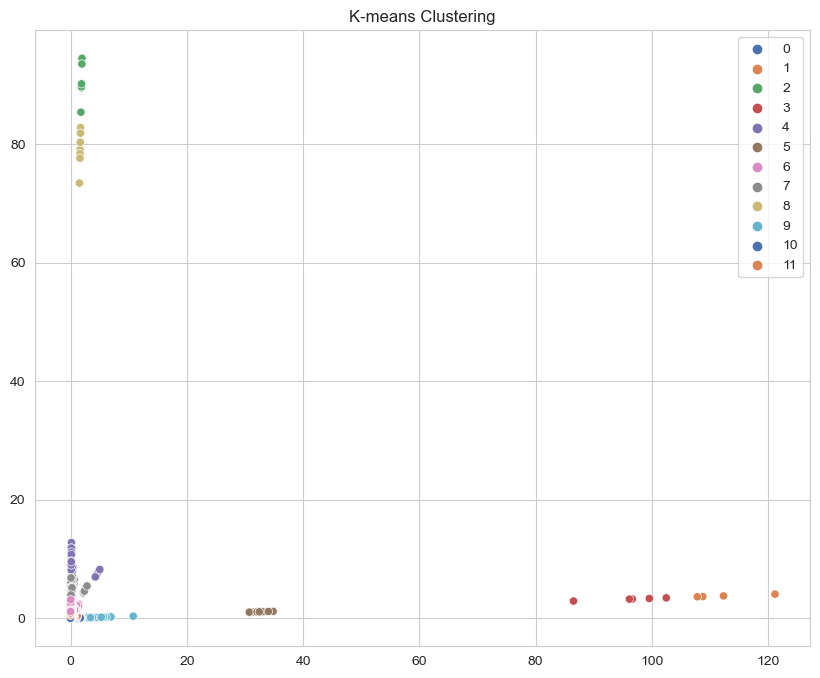

Silhouette Score: 0.8726
Calinski-Harabasz Score: 1507672.7428


In [ ]:
# 1. K-means
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, kmeans_labels, "K-means Clustering")
evaluate_clusters(X_scaled, kmeans_labels)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

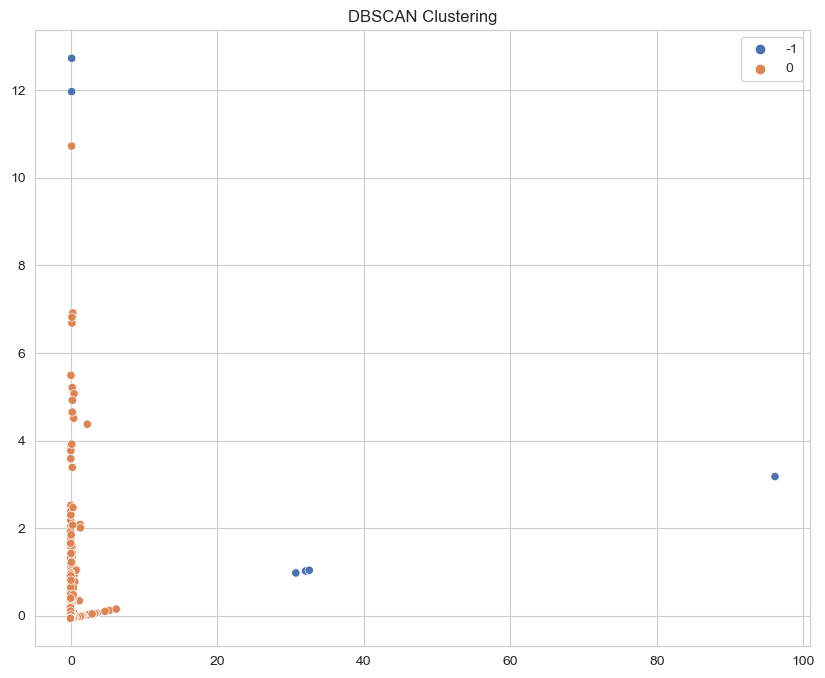

Silhouette Score: 0.9708
Calinski-Harabasz Score: 3665.1926


In [ ]:
import numpy as np
# Seleccionar aleatoriamente un subconjunto de datos
subset_indices = np.random.choice(X_scaled.shape[0], size=10000, replace=False)
X_subset = X_scaled[subset_indices]

# 2.1. DBSCAN
dbscan = DBSCAN(eps=4.5, min_samples=12)
dbscan_labels = dbscan.fit_predict(X_subset)
plot_clusters(X_subset, dbscan_labels, "DBSCAN Clustering")
evaluate_clusters(X_subset, dbscan_labels)

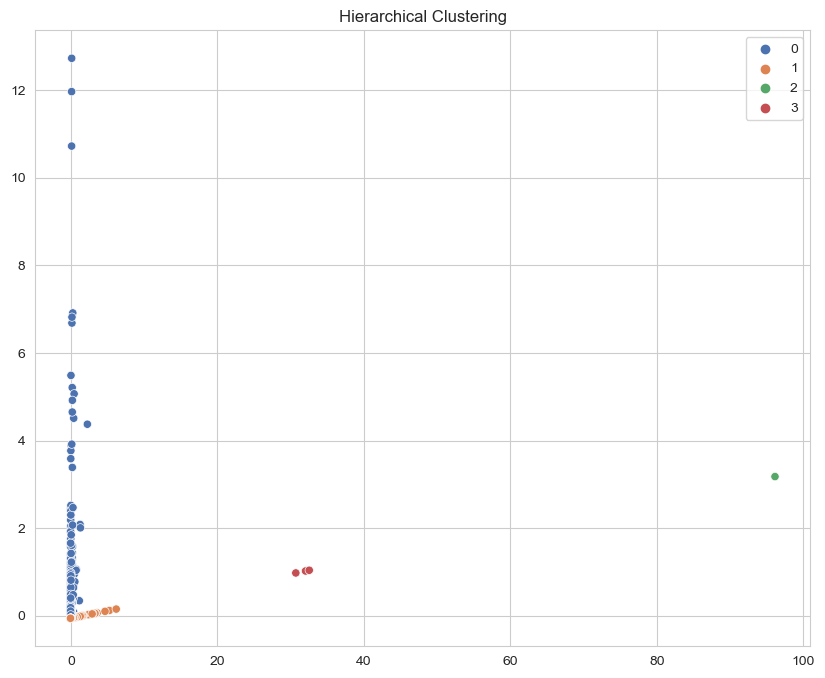

Silhouette Score: 0.9445
Calinski-Harabasz Score: 61067.8814


In [ ]:
# 3. Agrupamiento jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X_subset)
plot_clusters(X_subset, hierarchical_labels, "Hierarchical Clustering")
evaluate_clusters(X_subset, hierarchical_labels)

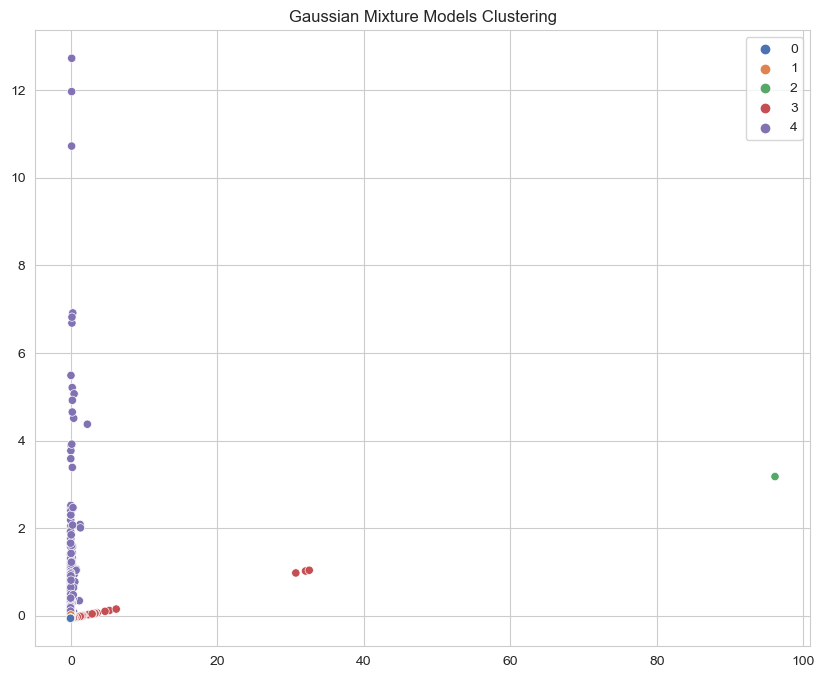

Silhouette Score: 0.8160
Calinski-Harabasz Score: 12600.6390


In [ ]:
# 4. Gaussian Mixture Models
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_subset)
plot_clusters(X_subset, gmm_labels, "Gaussian Mixture Models Clustering")
evaluate_clusters(X_subset, gmm_labels)

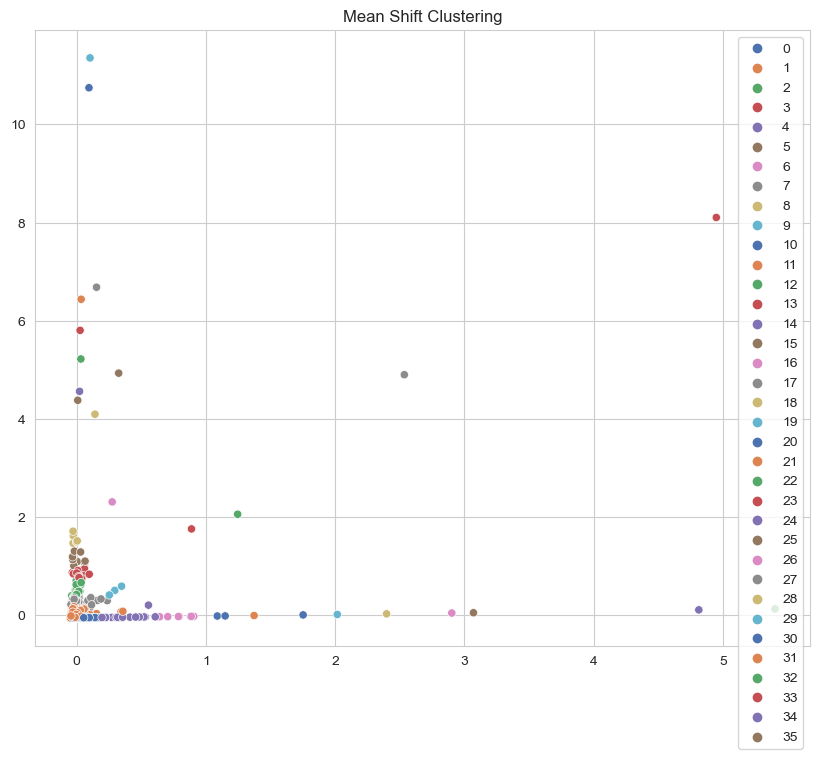

Silhouette Score: 0.8025
Calinski-Harabasz Score: 35256.3375


In [ ]:
import numpy as np
# Seleccionar aleatoriamente un subconjunto de datos
subset_indices = np.random.choice(X_scaled.shape[0], size=4000, replace=False)
X_subset = X_scaled[subset_indices]

# 5. Mean Shift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_subset)
plot_clusters(X_subset, mean_shift_labels, "Mean Shift Clustering")
evaluate_clusters(X_subset, mean_shift_labels)

### **Conclusiones y Comparación de modelos.**


- K-means (4 y 5 clusters) y DBSCAN muestran los mejores resultados en términos de Silhouette Score, todos por encima de 0.94.
- K-means con 5 clusters tiene el Calinski-Harabasz Score más alto, lo que indica una muy buena separación entre clusters.
- DBSCAN tiene el Silhouette Score más alto (0.9708), pero un Calinski-Harabasz Score relativamente bajo.
- El clustering jerárquico también muestra buenos resultados, similares a K-means.
- GMM y Mean Shift tienen puntuaciones más bajas en comparación con los otros métodos.


Sugerencia del mejor modelo:

Con base en estos resultados, sugeriría que K-means con 5 clusters podría ser el mejor modelo de segmentación. Tiene un Silhouette Score muy alto (0.9472) y el Calinski-Harabasz Score más alto (687139.6887), lo que indica clusters bien definidos y separados.


## **Modelando Segmentos con Análisis de componentes principales (PCA)**

In [ ]:
# Calcular características agregadas por cliente
cliente_features = df.groupby('cuenta').agg({
    'consumo': ['mean', 'std', 'min', 'max'],
    'categoria_cliente': 'first',
    'porcion': 'first',
    'descrip_poblac_suministro': 'first',
    'Pobl_2024': 'first'
}).reset_index()

In [ ]:
# Renombrar columnas
cliente_features.columns = ['cuenta', 'consumo_medio', 'consumo_std', 'consumo_min', 'consumo_max',
                            'categoria_cliente', 'porcion', 'ciudad', 'poblacion']

In [ ]:
# Codificar variables categóricas
cliente_features = pd.get_dummies(cliente_features, columns=['categoria_cliente', 'porcion', 'ciudad'], drop_first=True)

In [ ]:
cliente_features.isnull().sum()

cuenta               0
consumo_medio        0
consumo_std          0
consumo_min          0
consumo_max          0
categoria_cliente    0
porcion              0
ciudad               0
poblacion            0
dtype: int64

In [ ]:
cliente_features=cliente_features.dropna()

In [ ]:
# Aplicar PCA
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza
pca_features = pca.fit_transform(cliente_features.drop('cuenta', axis=1))

print(f"Número de componentes: {pca.n_components_}")

Número de componentes: 1


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108895 entries, 0 to 108894
Columns: 131 entries, categoria_cliente_10 to Pobl_2024
dtypes: float64(131)
memory usage: 108.8 MB


### Determinar el número óptimo de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

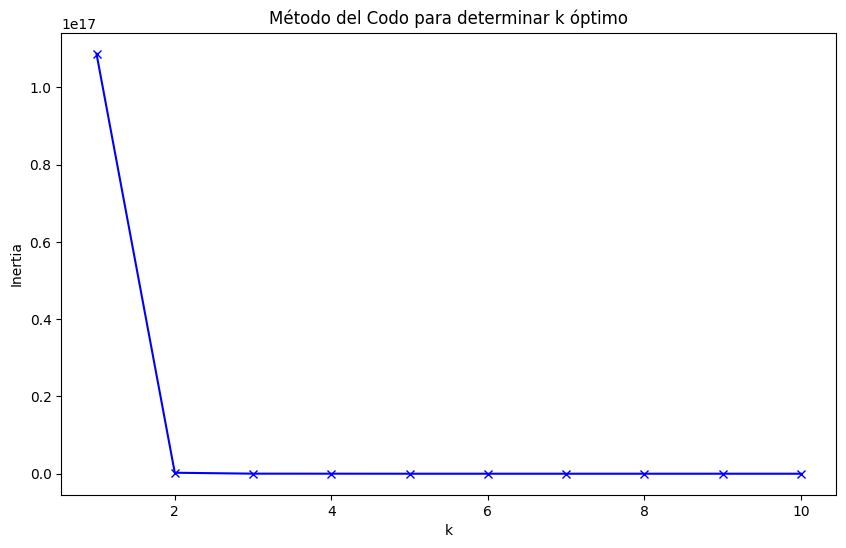

In [ ]:
# Método del codo
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del Codo para determinar k óptimo')
plt.show()

### Aplicar K-means con el número óptimo de clusters

In [ ]:
# Número óptimo es 2 (ajusta según el gráfico del método del codo)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cliente_features['cluster'] = kmeans.fit_predict(pca_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_labels2 = kmeans.fit_predict(pca_features  )
evaluate_clusters(pca_features, kmeans_labels2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.9612
Calinski-Harabasz Score: 32197213.9270


### Analizar los clusters

In [ ]:
cluster_labels = kmeans.fit_predict(pca_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Características promedio por cluster para columnas numéricas
cluster_means = cliente_features.select_dtypes(include=['number']).groupby('cluster').mean().round(2)
print(cluster_means)

         consumo_medio  consumo_std  consumo_min  consumo_max   poblacion
cluster                                                                  
0                32.40         5.63        23.41        42.21  7929539.00
1                18.25         4.88        10.90        26.89   121036.02
2                13.37         3.30         8.22        19.11   806253.00
3                13.99         3.35         8.46        19.70   619703.00


(7961, 1)


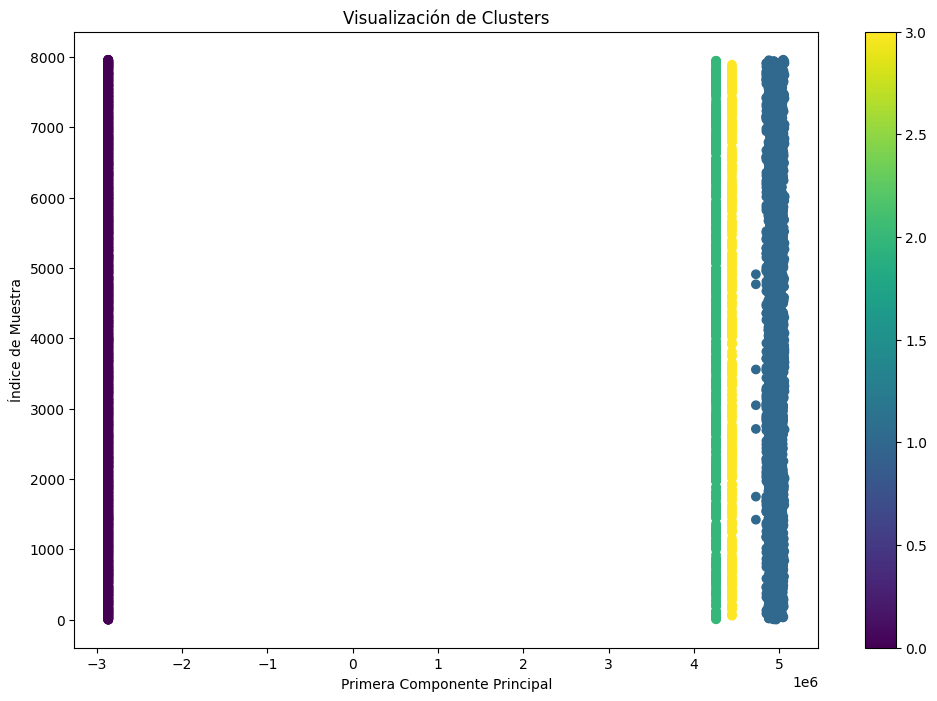

In [ ]:
# Visualización de clusters (usando las dos primeras componentes principales)
plt.figure(figsize=(12, 8))

# Verifica la forma de pca_features
print(pca_features.shape)

# Si pca_features solo tiene una columna, ajusta el código de visualización
if pca_features.shape[1] == 1:
    scatter = plt.scatter(pca_features[:, 0], range(len(pca_features)), c=cliente_features['cluster'], cmap='viridis')  # Usa el rango como segunda dimensión
    plt.ylabel('Índice de Muestra')  # Ajusta la etiqueta del eje y
else:
    scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cliente_features['cluster'], cmap='viridis')
    plt.ylabel('Segunda Componente Principal')

plt.xlabel('Primera Componente Principal')
plt.title('Visualización de Clusters')
plt.colorbar(scatter)
plt.show()

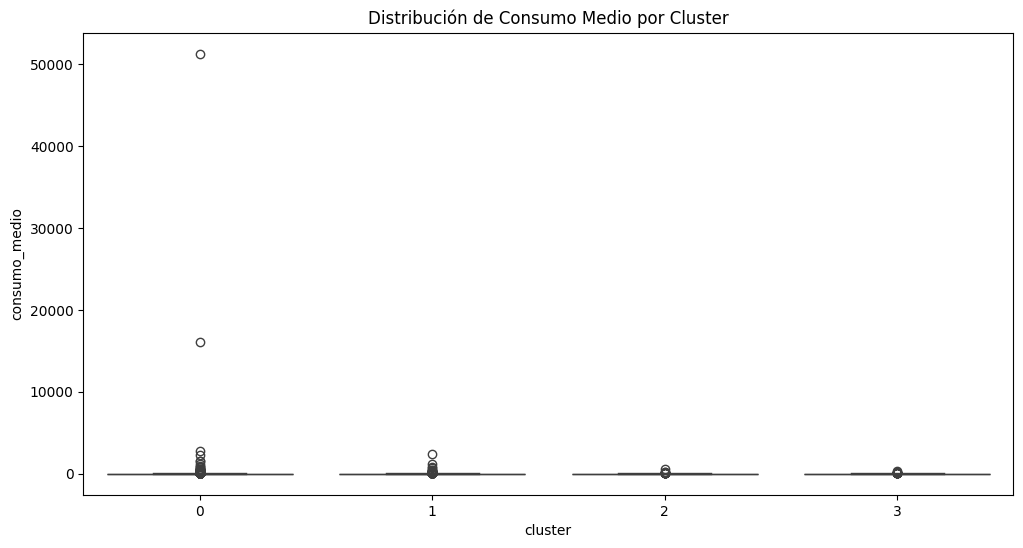

In [ ]:
# Distribución de consumo por cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='consumo_medio', data=cliente_features)
plt.title('Distribución de Consumo Medio por Cluster')
plt.show()

### Perfilar los clusters

In [ ]:
def perfil_cluster(cluster_id):
    cluster_data = cliente_features[cliente_features['cluster'] == cluster_id]
    print(f"Perfil del Cluster {cluster_id}:")
    print(f"Número de clientes: {len(cluster_data)}")
    print(f"Consumo medio: {cluster_data['consumo_medio'].mean():.2f}")
    print(f"Población media de las ciudades: {cluster_data['poblacion'].mean():.2f}")

    # Check if 'categoria_cliente' column exists before accessing it
    if 'categoria_cliente' in cluster_data.columns:
        print("Categorías de cliente más comunes:")
        print(cluster_data['categoria_cliente'].value_counts().head())
    else:
        print("La columna 'categoria_cliente' no está presente en los datos del cluster.")

    # Similarly, check for 'porcion' and 'ciudad' columns
    if 'porcion' in cluster_data.columns:
        print("Porciones más comunes:")
        print(cluster_data['porcion'].value_counts().head())
    else:
        print("La columna 'porcion' no está presente en los datos del cluster.")

    if 'ciudad' in cluster_data.columns:
        print("Ciudades más comunes:")
        print(cluster_data['ciudad'].value_counts().head())
    else:
        print("La columna 'ciudad' no está presente en los datos del cluster.")

    print("\n")

for i in range(n_clusters):
    perfil_cluster(i)

Perfil del Cluster 0:
Número de clientes: 4968
Consumo medio: 32.40
Población media de las ciudades: 7929539.00
La columna 'categoria_cliente' no está presente en los datos del cluster.
La columna 'porcion' no está presente en los datos del cluster.
La columna 'ciudad' no está presente en los datos del cluster.


Perfil del Cluster 1:
Número de clientes: 2073
Consumo medio: 18.25
Población media de las ciudades: 121036.02
La columna 'categoria_cliente' no está presente en los datos del cluster.
La columna 'porcion' no está presente en los datos del cluster.
La columna 'ciudad' no está presente en los datos del cluster.


Perfil del Cluster 2:
Número de clientes: 547
Consumo medio: 13.37
Población media de las ciudades: 806253.00
La columna 'categoria_cliente' no está presente en los datos del cluster.
La columna 'porcion' no está presente en los datos del cluster.
La columna 'ciudad' no está presente en los datos del cluster.


Perfil del Cluster 3:
Número de clientes: 373
Consumo medi

In [ ]:
df.head()

,cuenta,fec_contab_documento,consumo,categoria_cliente,porcion,dias_fact,descrip_poblac_suministro,Pobl_2024,consumo_per_capita
0,AATHHM6d7TyIT1ubMnB14A==,2023-04-22,0.0,60,P14,33,BOGOTA,7929539.0,0.0
1,AATHHM6d7TyIT1ubMnB14A==,2023-05-23,0.0,60,P14,27,BOGOTA,7929539.0,0.0
2,AATHHM6d7TyIT1ubMnB14A==,2023-06-23,0.0,60,P14,33,BOGOTA,7929539.0,0.0
3,AATHHM6d7TyIT1ubMnB14A==,2023-07-22,0.0,60,P14,27,BOGOTA,7929539.0,0.0
4,AATHHM6d7TyIT1ubMnB14A==,2023-08-23,0.0,60,P14,29,BOGOTA,7929539.0,0.0


In [ ]:
# Información adicional
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Añadir las etiquetas de cluster al DataFrame original
df_clean = cliente_features.copy()
df_clean['Cluster'] = cluster_labels

# Análisis de clusters
for cluster in range(4):
    print(f"\nCluster {cluster}:")
    print(df_clean[df_clean['Cluster'] == cluster].describe())

Varianza explicada por cada componente principal:
[0.99999992]

Cluster 0:
       consumo_medio  consumo_std   consumo_min   consumo_max  poblacion  \
count    4968.000000  4968.000000   4968.000000   4968.000000     4968.0   
mean       32.396633     5.625002     23.407186     42.207751  7929539.0   
std       765.721881    73.810416    647.866295    890.675869        0.0   
min         0.000000     0.000000      0.000000      0.000000  7929539.0   
25%         5.928571     1.603567      1.000000     10.000000  7929539.0   
50%        11.142857     2.702258      5.000000     16.000000  7929539.0   
75%        19.089286     4.565759     12.000000     26.000000  7929539.0   
max     51293.111111  5086.383795  42883.000000  60061.000000  7929539.0   

       Cluster  
count   4968.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1:
       consumo_medio  consumo_std  consumo_min  consumo_max      poblacion 

# **Conclusiones Finales**
Tenemos como modelo final un K-Means con K=4, utilizando una transformación de variables PCA con 1 componente (>95% de varianza). \


**Cluster 0:** Grandes Consumidores Urbanos.

**Análisis:** Este grupo representa a los clientes de mayor consumo en áreas urbanas densamente pobladas. La alta variabilidad en el consumo sugiere una mezcla de tipos de clientes, posiblemente incluyendo negocios y hogares de alto consumo. \
**Estrategias:**

- Implementar programas de eficiencia del servicio para grandes consumidores.
- Ofrecer tarifas escalonadas que incentiven la reducción del consumo.
- Desarrollar programas de lealtad que recompensen el uso eficiente de energía.
- Implementar programas de eficiencia en el uso de gas natural para grandes consumidores.

**Cluster 1:** Consumidores Moderados en Ciudades Pequeñas.

**Análisis:** Este grupo representa consumidores moderados de gas natural en áreas menos pobladas. La variabilidad moderada sugiere un patrón de consumo más estable, posiblemente influenciado por factores estacionales.

**Estrategias:**

- Ofrecer planes de gas natural personalizados basados en patrones de uso estacional.
- Implementar programas comunitarios de eficiencia en el uso de gas.
- Proporcionar herramientas de monitoreo de consumo de gas en tiempo real.
- Desarrollar campañas educativas sobre el uso eficiente de calefacción y agua caliente.


**Cluster 2:** Consumidores de Bajo Volumen en Ciudades Medianas.

**Análisis:** Este grupo representa consumidores de bajo volumen de gas natural en ciudades medianas. El bajo consumo y la baja variabilidad sugieren un uso eficiente o limitado de gas.
**Estrategias:**

- Ofrecer incentivos para la instalación de sistemas de calefacción y agua caliente de alta eficiencia.
- Proponer planes de gas natural con precios fijos para dar estabilidad a los consumidores de bajo volumen.
- Implementar programas de recompensas por uso eficiente del gas.
- Desarrollar aplicaciones móviles para gestionar y optimizar el consumo de gas.

**Cluster 3:** Consumidores de Bajo Volumen en Ciudades Grandes.

**Análisis:** Este grupo es similar al Cluster 2 en términos de consumo, pero en ciudades más grandes. Podría representar hogares eficientes o pequeños negocios en áreas urbanas con uso limitado de gas natural.

**Estrategias:**

- Ofrecer servicios de auditoría de eficiencia de gas natural gratuitos.
- Proponer planes de gas con precios dinámicos para aprovechar los períodos de menor demanda.
- Implementar programas de modernización de infraestructura de gas en comunidades urbanas.
- Desarrollar partnerships con empresas locales para promover electrodomésticos de gas eficientes.

**Estrategias generales** para aumentar la satisfacción y rentabilidad en el sector de gas natural:

- **Personalización:** Adaptar la comunicación y las ofertas según las características de consumo de gas de cada cluster.
- **Digitalización:** Implementar plataformas digitales para facilitar la gestión del consumo de gas y la interacción con los clientes.
- **Sostenibilidad:** Enfatizar iniciativas de eficiencia en el uso de gas natural y explorar opciones de gas renovable.
- **Educación:** Proporcionar recursos educativos sobre uso seguro y eficiente del gas natural.
- **Innovación:** Introducir tecnologías de medición inteligente para mejorar la eficiencia y la experiencia del cliente.
- **Programas de lealtad:** Implementar sistemas de recompensas que incentiven el uso eficiente del gas natural.
- **Análisis predictivo:** Utilizar los datos de consumo para anticipar necesidades de mantenimiento y prevenir fugas.

Aplicando estas o algunas de estas _**estrategias**_ debería ayudar a mejorar la satisfacción del cliente al ofrecer servicios más personalizados y relevantes en el sector de gas natural, mientras se optimiza el consumo y se aumenta la rentabilidad a través de una mejor gestión de recursos y fidelización de clientes.